Business problem overview
 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

#### Importing Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

#### Reading the dataset

In [2]:
# reading the data and setting mobile_number as index, it being unique column
tel_churn = pd.read_csv(r'C:\Users\sbgha\Downloads\telecom_churn_data.csv')
tel_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
print(tel_churn.shape)
print(tel_churn.describe(percentiles=[0.25,0.50,0.75, 0.95, 0.99]))

(99999, 226)
       mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std   

In [4]:
tel_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

#### Handling missing values

##### Handling missing values in columns

In [5]:
# Cheking percent of missing values in columns
missing_columns = (round(((tel_churn.isnull().sum()/len(tel_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


In [6]:
# Listing the columns having more than 30% missing values
missing_abv_30 = list(missing_columns.index[missing_columns['null'] > 30])
missing_abv_30

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [7]:
# Dropping the columns having more than 30% missing values and checking shape
tel_churn = tel_churn.drop(missing_abv_30, axis=1)
tel_churn.shape

(99999, 186)

In [8]:
# Deleting the date columns as the date columns are not required in our analysis
# List the date columns
date_cols = [k for k in tel_churn.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [9]:
# Dropping date columns
tel_churn = tel_churn.drop(date_cols, axis=1)

In [10]:
# Drop circle_id column
tel_churn = tel_churn.drop('circle_id', axis=1)
tel_churn.shape

(99999, 177)

Seems like a lot of columns have similar missing values

As per the problem statement given below:
1. Filter high-value customers

As mentioned above, you need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 30k rows.

In [11]:
# Creating column avg_rech_amt for 6th and 7th month by summing up total recharge amount of month 6 and 7. Then taking the average of the total.

tel_churn['avg_rech_amt'] = (tel_churn['total_rech_amt_6'] + tel_churn['total_rech_amt_7'])/2


In [12]:
# Filter the customers, who have recharged more than or equal to the 70th percentile of the avg_rech_amt

tel_churn = tel_churn[tel_churn['avg_rech_amt'] >= tel_churn['avg_rech_amt'].quantile(0.7)]
tel_churn.head()


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83

In [13]:
tel_churn.shape

(30011, 178)

Handling missing values in rows


In [14]:
# Count the rows having more than 50% missing values
missing_rows_50per = tel_churn[(tel_churn.isnull().sum(axis=1)) > (len(tel_churn.columns)//2)]
missing_rows_50per.shape

(114, 178)

In [15]:
# Deleting the rows having more than 50% missing values
tel_churn = tel_churn.drop(missing_rows_50per.index)
tel_churn.shape

(29897, 178)

In [16]:
# Checking the missing values in columns again
missing_col_df = (round(((tel_churn.isnull().sum()/len(tel_churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_col_df

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2c_mou_9,5.32
std_ic_t2m_mou_9,5.32
loc_og_mou_9,5.32
std_og_t2t_mou_9,5.32


In [17]:
df = tel_churn.copy()

In [18]:
# checking the records for the 'mou_9', wherein these coulmns have missing values altogether.

# Listing the columns of 'mou_9'
print(((missing_columns[missing_columns['null'] == 5.32]).index).to_list())

[]


In [19]:
# Creating a dataframe with the condition, in which 'mou_9' are na
df_mou_9_na = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

In [20]:
print(df_mou_9_na.head())
print(df_mou_9_na.shape)

     mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7       7000701601             0.0             0.0             0.0  1069.180   
97      7000589828             0.0             0.0             0.0   374.863   
111     7001300706             0.0             0.0             0.0   596.301   
143     7000106299             0.0             0.0             0.0   695.609   
188     7000340381             0.0             0.0             0.0   734.641   

       arpu_7    arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7    1349.850  3171.480   500.0        57.84        54.68        52.29   
97    294.023   183.043     0.0       433.59       415.66       221.06   
111   146.073     0.000     0.0        55.19         3.26          NaN   
143    39.981     0.000     0.0      1325.91        28.61          NaN   
188   183.668     0.000     0.0         4.38         0.98          NaN   

     onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  

In [21]:
# Dropping the records for which mou_9 are na's
df = df.drop(df_mou_9_na.index)

In [22]:
# Again Cheking percent of missing values in columns
missing_col_df = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_col_df

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
loc_og_t2t_mou_8,0.55
std_ic_t2f_mou_8,0.55
std_og_t2m_mou_8,0.55
loc_og_t2m_mou_8,0.55


In [23]:
# checking the records for the 'mou_8', wherein these coulmns have missing values altogether.

# Listing the columns of 'mou_8'
print(((missing_col_df[missing_col_df['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [24]:
# Creating a dataframe with the condition, wherein mou_8 are na's
df_mou_8_na = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

In [25]:
print(df_mou_8_na.head())
print(df_mou_8_na.shape)

      mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
375      7002252754             0.0             0.0             0.0  580.477   
578      7000248548             0.0             0.0             0.0  569.612   
788      7000636808             0.0             0.0             0.0  532.742   
1802     7000516213             0.0             0.0             0.0  810.455   
4837     7002192662             0.0             0.0             0.0  649.150   

       arpu_7  arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
375   111.878     0.0  378.881       249.43        39.64          NaN   
578   237.289     0.0    4.440       718.01       212.73          NaN   
788   546.756     0.0  269.274      1173.39       891.83          NaN   
1802    0.000     0.0    0.000        91.33          NaN          NaN   
4837  149.572     0.0    0.250      1354.24        85.13          NaN   

      onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
375

In [26]:
# Dropping the records for which mou_8 are na's
df = df.drop(df_mou_8_na.index)

In [27]:
# Again cheking percent of missing values in columns
missing_col_df = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_col_df

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_ic_t2m_mou_6,0.44
isd_og_mou_6,0.44
loc_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44


In [28]:
# checking the records for the 'mou_6', wherein these coulmns have missing values altogether.

# Listing the columns of 'mou_6'
print(((missing_col_df[missing_col_df['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [29]:
# Creating a dataframe with the condition, wherein mou_6 are na's
df_mou_6_na = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

In [30]:
# Droppig the records for which mou_6 are na's
df = df.drop(df_mou_6_na.index)

In [31]:
# Again cheking percent of missing values in columns
missing_col_df = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_col_df

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
std_og_t2t_mou_7,0.12
std_og_t2f_mou_7,0.12
std_og_t2c_mou_7,0.12
std_og_mou_7,0.12
ic_others_7,0.12


In [32]:
# Listing the columns of mou_7
print(((missing_col_df[missing_col_df['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [33]:
# Creating a dataframe with the condition, wherein mou_7 are na's
df_mou_7_na = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

In [34]:
print(df_mou_7_na.head())
print(df_mou_7_na.shape)

       mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
5616      7001238202             0.0             0.0             0.0   
9451      7001477649             0.0             0.0             0.0   
9955      7001658068             0.0             0.0             0.0   
10724     7001391499             0.0             0.0             0.0   
12107     7000131738             0.0             0.0             0.0   

         arpu_6   arpu_7   arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
5616    760.815  531.088  992.818  1144.676       324.91          NaN   
9451   1129.566    0.000  128.252   802.648        11.89          NaN   
9955    925.028  189.000  789.761   445.707        46.39          NaN   
10724   894.818   85.000  207.040   363.314       117.21          NaN   
12107  1803.475    0.000    0.600    25.243      1742.61          NaN   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
5616        386.13      1180.29        350.29      

In [35]:
# Dropping the records for which mou_7 are na's
df = df.drop(df_mou_7_na.index)

In [36]:
# Again cheking percent of missing values in columns
missing_col_df = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_col_df

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0


#### Deriving churn dataset
Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

In [37]:
# creating the new dataset for high filtered customers
churn_filtered = df.copy()

In [38]:
# calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [39]:
# calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [40]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [41]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

Deleting all the attributes corresponding to the churn phase


In [42]:
# List the columns for churn month(9)
col_9 = [col for col in churn_filtered.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [43]:
# Deleting the churn month columns
churn_filtered = churn_filtered.drop(col_9, axis=1)

In [44]:
# Dropping sep_vbc_3g column
churn_filtered = churn_filtered.drop('sep_vbc_3g', axis=1)

Checking churn percentage


In [45]:
round(100*(churn_filtered['churn'].mean()),2)


3.39

In [46]:
# change data type to category
churn_filtered.churn = churn_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn Ratio:
0    96.609625
1     3.390375
Name: churn, dtype: float64


In [47]:
churn_filtered.shape

(27991, 136)

#### Handling Outliers

In [48]:
churn_filtered['mobile_number'] = churn_filtered['mobile_number'].astype(object)
churn_filtered['churn'] = churn_filtered['churn'].astype(object)

In [49]:
churn_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [50]:
# List only the numeric columns
columns_num = churn_filtered.select_dtypes(exclude=['object']).columns
print(columns_num)


Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt'],
      dtype='object', length=134)


In [51]:
# Removing outliers below 10th and above 90th percentile
for col in columns_num: 
    q1 = churn_filtered[col].quantile(0.10)
    q3 = churn_filtered[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = churn_filtered.loc[(churn_filtered[col] > range_low) & (churn_filtered[col] < range_high)]

data.shape

(27705, 136)

Deriving new columns

In [52]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Deriving new column decrease_mou_action

##### This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.


In [53]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [54]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [55]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [56]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

#### Deriving new column decrease_rech_num_action


##### This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.



In [57]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [58]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [59]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

Deriving new column decrease_rech_amt_action


In [60]:
##### This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2


In [61]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [62]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

Deriving new column decrease_arpu_action


In [63]:
# This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2


In [64]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [65]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

Deriving new column decrease_vbc_action


In [66]:
# This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2


In [67]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [68]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [69]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,2

Deriving new column decrease_rech_num_action


In [70]:
# This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [71]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [72]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

### EDA

#### Univariate analysis


##### Churn rate on the basis whether the customer decreased her/his MOU in action month


In [73]:
# Converting churn column to int
data['churn'] = data['churn'].astype('int64')

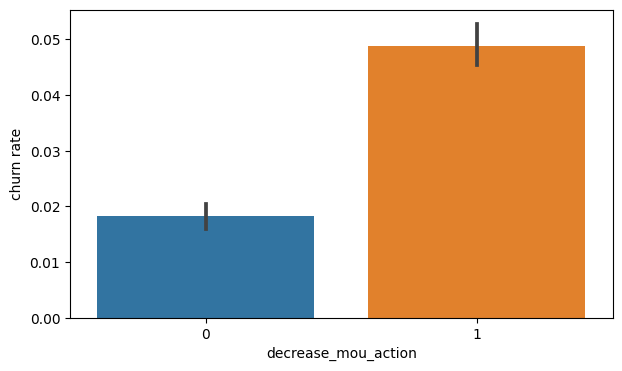

In [74]:
plt.figure(figsize=(7,4))
sns.barplot(data['decrease_mou_action'], data['churn'])
plt.ylabel('churn rate')
plt.show()

obs : We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.



Churn rate on the basis whether the customer decreased her/his number of recharge in action month


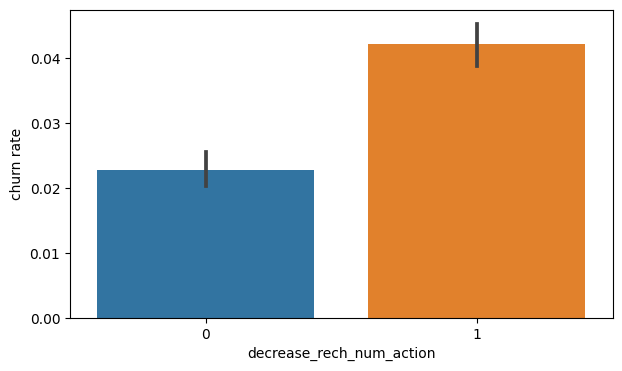

In [75]:
plt.figure(figsize=(7,4))
sns.barplot(data['decrease_rech_num_action'], data['churn'])
plt.ylabel('churn rate')
plt.show()

Obs : As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.



Churn rate on the basis whether the customer decreased her/his number of recharge in action month


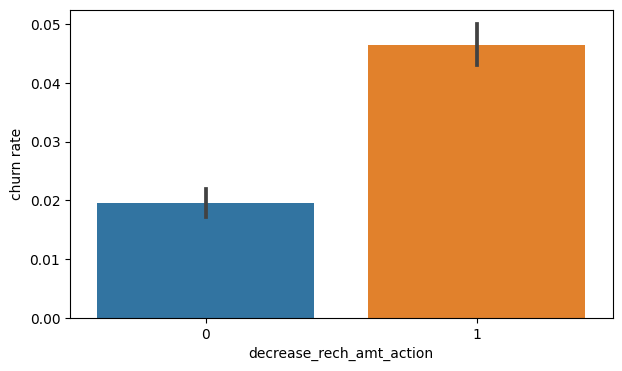

In [76]:
plt.figure(figsize=(7,4))
sns.barplot(data['decrease_rech_amt_action'], data['churn'])
plt.ylabel('churn rate')
plt.show()

Obs : Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.



Churn rate on the basis whether the customer decreased her/his volume based cost in action month


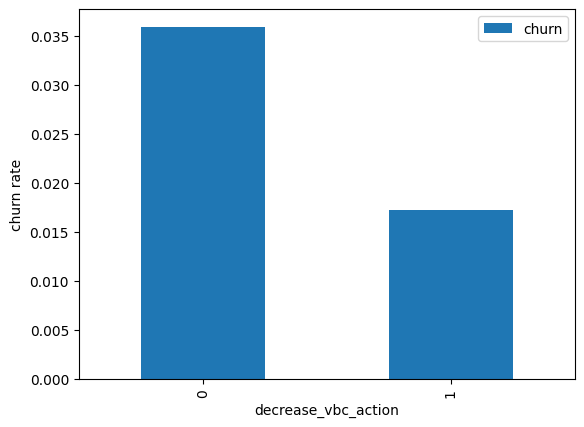

In [77]:

data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Obs : Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

In [78]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

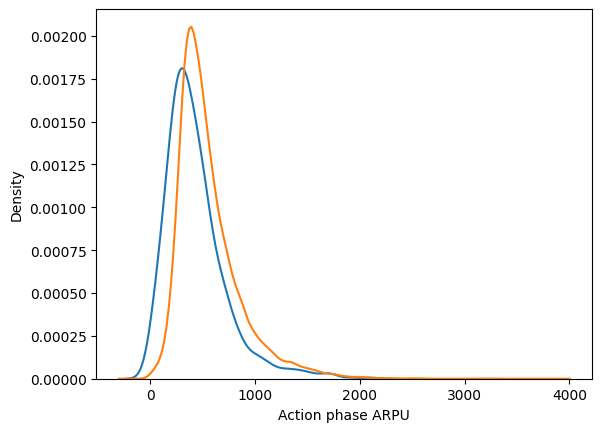

In [79]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000.

[Text(0.5, 0, 'Action phase MOU')]

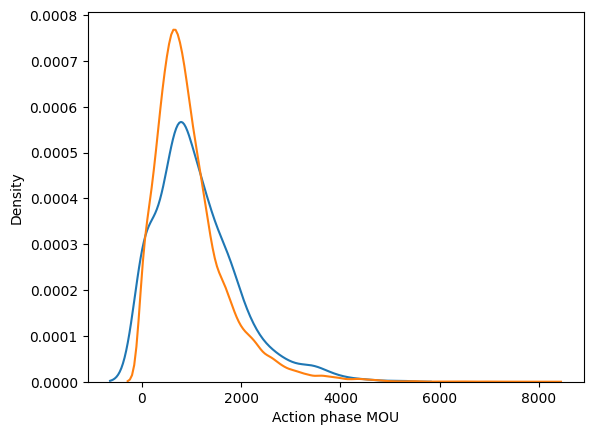

In [80]:
# Analysis of the minutes of usage MOU (churn and not churn) in the action phase
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')


Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.



## Bivariate analysis


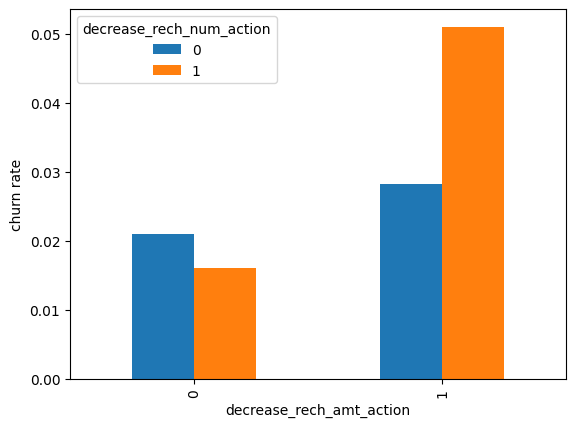

In [81]:
# Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Obs : We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

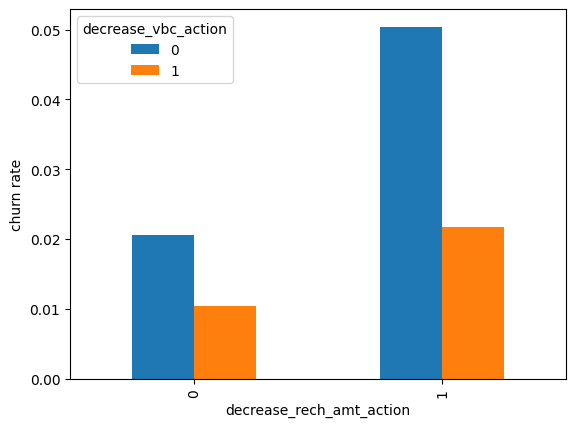

In [82]:
# Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Obs : Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

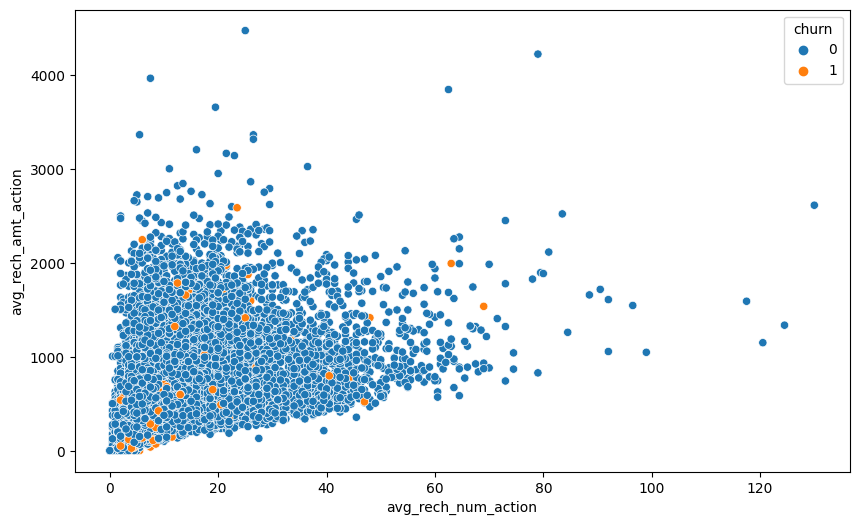

In [83]:
# Analysis of recharge amount and number of recharge in action month
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)

Obs : We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

In [84]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'], axis=1)

## Train-test Split

In [85]:
from sklearn.model_selection import train_test_split
# Putting feature variables into X
X = data.drop(['churn','mobile_number'], axis=1)

# Putting target variable to y
y = data['churn']

In [86]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [87]:
data['churn'].value_counts(normalize=True)

0    0.96636
1    0.03364
Name: churn, dtype: float64

There is high class imbalance in the churned data, let's deal with it using SMOTE

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [89]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()

In [90]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')

In [91]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [92]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.138099,-0.524287,-0.277210,0.107067,-0.662133,-0.465702,-0.212150,-0.635989,0.316602,-0.254930,-0.001299,-0.235845,-0.299924,-0.376405,-0.414431,-0.263290,-0.311912,-0.251552,0.484696,-0.191237,-0.399363,-0.257169,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,0.128525,-0.336170,-0.418989,0.255586,-0.528520,-0.337598,-0.342567,-0.503801,0.649999,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.048264,-0.731099,0.214395,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.018022,-0.347135,-0.015583,-0.013735,-0.000842,-0.860270,-0.011338,-0.204497,-0.267019,-0.242904,-0.380904,-0.273133,-0.437678,-0.290227,-0.270855,-0.150113,-0.409476,-0.364422,-0.440556,-0.175817,-0.159844,0.078725,-0.165109,0.366888,-0.117347,-0.136268,-0.137646,-0.110633,0.0,0.0,0.0,-0.235898,0.120717,-0.064064,-0.476525,-0.287711,-0.420934,-0.366938,-0.089565,-0.191817,-0.152636,-0.154479,-0.126705,-0.099701,-0.120560,-0.081522,0.191045,-0.446453,0.304052,0.041674,-0.726612,-0.236245,0.053942,0.023188,0.029579,0.601919,-0.810926,-0.627031,-0.094599,0.700387,1.751483,0.513596,1.201853,-0.241485,3.235900,3.107186,-0.232664,4.035347,2.355546,2.447099,-0.225005,-0.221607,-0.216069,-0.14124,-0.137326,-0.114084,-0.361381,-0.236073,-0.265248,0.110852,-0.426903,1,1,1,1,3.584604
1,0.0,0.0,0.0,-1.426806,4.416224,3.251471,-0.658546,-0.237116,-0.004389,-0.775413,2.521574,2.729991,-0.254930,-0.253598,-0.304936,-0.299924,-0.376405,-0.432652,-0.201389,0.270420,0.198129,-0.529895,1.105781,0.288744,-0.276559,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.477412,0.843110,0.290263,-0.570492,-0.320415,-0.040870,-0.512457,2.293280,3.084824,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.771806,1.366671,2.063557,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.970474,1.667933,1.938185,-0.411171,0.192864,0.156404,-0.482016,0.744097,0.256463,-0.290227,-0.270855,-0.257736,-0.583618,0.569677,0.219308,-0.216145,

In [93]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.241426,-0.270857,1.004286,-0.725392,-0.690239,-0.476559,0.480613,0.306880,2.321843,-0.077770,-0.253598,-0.304936,0.213029,-0.376405,-0.432652,-0.278196,-0.282988,-0.106923,0.027413,0.005712,0.033944,-0.088284,-0.268141,-0.245271,0.034550,-0.268757,-0.245087,-0.161739,-0.195986,-0.055352,-0.610719,-0.570355,-0.419779,0.345721,0.369717,2.699760,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.214893,-0.152342,1.550206,-0.080736,-0.09221,-0.061548,1.046227,0.769115,0.756843,0.310975,-0.015583,-0.013735,-0.254734,-0.210329,1.353627,-0.357411,-0.095324,0.281713,0.088773,-0.113229,0.515837,-0.290227,-0.270855,-0.194305,-0.156563,-0.166880,0.468091,-0.216145,-0.200470,-0.187246,0.112473,-0.185608,-0.166229,-0.136268,-0.137646,-0.110633,0.0,0.0,0.0,-0.079108,-0.265838,-0.233517,-0.195250,-0.205183,0.286117,-0.366938,-0.089565,-0.191817,-0.152636,0.283914,-0.126705,-0.099701,-0.12056,-0.081522,-0.157743,0.258304,1.304100,0.084981,-0.238428,0.816186,0.053942,-0.174410,0.029579,0.175702,0.368491,-0.352081,3.322563,2.186970,-0.098368,-0.263171,-0.064325,0.507365,3.235900,-0.251023,-0.232664,0.459436,2.355546,2.447099,-0.225005,-0.221607,-0.216069,1.303180,1.208915,2.526212,0.224938,0.018315,0.195420,-0.259107,-0.097181,0,0,1,1,-0.278971
64892,0.0,0.0,0.0,0.045864,-0.780568,-0.158953,-0.734179,-0.698080,-0.502143,-0.359083,-0.577343,-0.256317,0.022647,-0.253598,-0.304936,-0.120567,-0.376405,-0.432652,-0.278359,-0.302953,-0.174725,-0.300718,-0.204587,-0.296065,-0.262173,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.379480,-0.338577,-0.306903,-0.619861,-0.570355,-0.415489,-0.232172,-0.436745,-0.040625,-0.144889,-0.14045,-0.104453,0.0,0.0,0.0,-0.616567,-0.714280,-0.305692,-0.080736,-0.09221,-0.061548,-0.328949,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.776089,-0.845186,-0.422237,-0.108509,-0.347909,-0.187577,0.377466,0.198985,0.240809,-0.275563,-0.257474,-0.235189,0.172282,-0.079190,0.045787,-0.21614

### Building Logistic Regression model with manual Selection

In [94]:
import statsmodels.api as sm
# Instantiate the model
# Adding the constant to X_train
logreg = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
# Fit the model
logreg = logreg.fit().summary()

In [95]:
logreg

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42719
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 14 Apr 2023   Deviance:                       4113.6
Time:                        18:37:26   Pearson chi2:                 2.80e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4355.6852   2.06e+05      0.021      0.983   -3.99e+05    4.08e+05
loc_og_t2o_mou               0.0018      0.081      0.022      0.982      -0.158       0.161
std_og_t2o_mou               0.0054      0.244      0.022      0.982      -0.474       0.484
loc_ic_t2o_mou               0.0133      0.603      0.022      0.982      -1.169       1.196
arpu_6                      -0.1458      0.159     -0.915      0.360      -0.458       0.167
arpu_7                       0.0533      0.168      0.316      0.752      -0.277       0.384
arpu_8                       0.0808      0.224      0.361      0.718      -0.357       0.519
onnet_mou_6                  6.3014      7.283      0.865      0.387      -7.973      20.576
onnet_mou_7                  2.9256      4.139      0.707      0.480      -5.186      11.037
onnet_mou_8                 -4.0395      4.085     -0.989      0.323     -12.047       3.968
offnet_mou_6                 6.3809      6.866      0.929      0.353      -7.077      19.838
offnet_mou_7                 3.5523      3.967      0.896      0.371      -4.222      11.327
offnet_mou_8                -5.1033      4.266     -1.196      0.232     -13.464       3.257
roam_ic_mou_6                0.1035      0.058      1.794      0.073      -0.010       0.217
roam_ic_mou_7               -0.0417      0.070     -0.593      0.553      -0.180       0.096
roam_ic_mou_8                0.0516      0.054      0.951      0.342      -0.055       0.158
roam_og_mou_6               -1.9821      2.322     -0.854      0.393      -6.532       2.568
roam_og_mou_7               -0.7344      1.077     -0.682      0.495      -2.845       1.376
roam_og_mou_8                1.3287      1.195      1.112      0.266      -1.014       3.671
loc_og_t2t_mou_6         -2036.5926   1503.807     -1.354      0.176   -4984.001     910.815
loc_og_t2t_mou_7          -609.7553   1582.637     -0.385      0.700   -3711.668    2492.157
loc_og_t2t_mou_8          3107.2414   1654.419      1.878      0.060    -135.361    6349.844
loc_og_t2m_mou_6         -2062.0967   1522.281     -1.355      0.176   -5045.713     921.520
loc_og_t2m_mou_7          -575.6253   1492.917     -0.386      0.700   -3501.688    2350.438
loc_og_t2m_mou_8          3315.3223   1765.105      1.878      0.060    -144.220    6774.864
loc_og_t2f_mou_6          -176.5028    130.329     -1.354      0.176    -431.943      78.937
loc_og_t2f_mou_7           -51.1578    132.599     -0.386      0.700    -311.047     208.731
loc_og_t2f_mou_8           274.7451    146.459      1.876      0.061     -12.310     561.800
loc_og_t2c_mou_6             0.0303      0.053      0.574      0.566      -0.073       0.134
loc_og_t2c_mou_7             0.0207      0.041      0.501      0.616      -0.060       0.102
loc_og_t2c_mou

Obs : There are few features that have positive coefficients and few have negative.
features having higher p-values become insignificant in the model. Therefore we will use RFE for feature selection and then we"ll manually eliminate insignificant features.

In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [97]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 125),
 ('std_og_t2o_mou', False, 124),
 ('loc_ic_t2o_mou', False, 123),
 ('arpu_6', False, 94),
 ('arpu_7', False, 87),
 ('arpu_8', False, 9),
 ('onnet_mou_6', False, 72),
 ('onnet_mou_7', False, 22),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 63),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 59),
 ('roam_ic_mou_7', False, 77),
 ('roam_ic_mou_8', False, 25),
 ('roam_og_mou_6', False, 58),
 ('roam_og_mou_7', False, 45),
 ('roam_og_mou_8', False, 5),
 ('loc_og_t2t_mou_6', False, 69),
 ('loc_og_t2t_mou_7', False, 24),
 ('loc_og_t2t_mou_8', False, 29),
 ('loc_og_t2m_mou_6', False, 30),
 ('loc_og_t2m_mou_7', False, 2),
 ('loc_og_t2m_mou_8', False, 18),
 ('loc_og_t2f_mou_6', False, 50),
 ('loc_og_t2f_mou_7', False, 98),
 ('loc_og_t2f_mou_8', False, 49),
 ('loc_og_t2c_mou_6', False, 73),
 ('loc_og_t2c_mou_7', False, 107),
 ('loc_og_t2c_mou_8', False, 81),
 ('loc_og_mou_6', False, 68),
 ('loc_og_mou_7', False, 97),
 ('loc

In [99]:
# RFE selected columns
col = X_train.columns[rfe.support_]
print(col)

Index(['onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2f_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')


Model building using RFE selected columns

In [100]:
# Adding constant and Instantiatiating the model

logreg1 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())

# Fit the model
logreg1 = logreg1.fit().summary()
logreg1

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 14 Apr 2023   Deviance:                       30932.
Time:                        18:40:14   Pearson chi2:                 8.69e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -53.0021   4234.833     -0.013      0.990   -8353.122    8247.118
onnet_mou_8          4.2619      0.110     38.848      0.000       4.047       4.477
offnet_mou_7         0.5277      0.080      6.631      0.000       0.372       0.684
offnet_mou_8         1.2357      0.109     11.327      0.000       1.022       1.450
std_og_t2m_mou_7     0.1569      0.081      1.926      0.054      -0.003       0.317
std_og_t2m_mou_8     2.3922      0.115     20.836      0.000       2.167       2.617
isd_og_mou_8        -1.0030      0.195     -5.133      0.000      -1.386      -0.620
og_others_7         -1.1388      0.771     -1.477      0.140      -2.650       0.373
og_others_8      -3772.0699   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
total_og_mou_8      -6.8059      0.169    -40.384      0.000      -7.136      -6.476
loc_ic_t2f_mou_8    -0.6546      0.070     -9.340      0.000      -0.792      -0.517
loc_ic_mou_8        -2.0476      0.067    -30.753      0.000      -2.178      -1.917
std_ic_t2f_mou_8    -0.7405      0.074    -10.022      0.000      -0.885      -0.596
ic_others_8         -1.5850      0.133    -11.885      0.000      -1.846      -1.324
monthly_2g_8        -0.9476      0.043    -21.784      0.000      -1.033      -0.862
monthly_3g_8        -1.1261      0.046    -24.565      0.000      -1.216      -1.036
====================================================================================
"""

Checking VIF's

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_og_mou_8,31.92
2,offnet_mou_8,22.77
3,std_og_t2m_mou_7,17.15
1,offnet_mou_7,16.52
4,std_og_t2m_mou_8,14.37
0,onnet_mou_8,14.21
10,loc_ic_mou_8,1.68
9,loc_ic_t2f_mou_8,1.21
7,og_others_8,1.05
6,og_others_7,1.04


In [102]:
# Removing og_others_8 column as it's p-value is high
col = col.drop('og_others_8', 1)
print(col)

Index(['onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'total_og_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8',
       'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')


2nd Model

In [103]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[col])

#Instantiate the model
logreg2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
logreg2 = logreg2.fit()

logreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15500.
Date:                Fri, 14 Apr 2023   Deviance:                       31001.
Time:                        18:40:18   Pearson chi2:                 8.67e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4846
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2135      0.031    -38.942      0.000      -1.275      -1.152
onnet_mou_8          4.2635      0.109     39.049      0.000       4.050       4.478
offnet_mou_7         0.5322      0.080      6.690      0.000       0.376       0.688
offnet_mou_8         1.2309      0.109     11.307      0.000       1.018       1.444
std_og_t2m_mou_7     0.1505      0.081      1.848      0.065      -0.009       0.310
std_og_t2m_mou_8     2.3985      0.115     20.913      0.000       2.174       2.623
isd_og_mou_8        -1.0996      0.204     -5.385      0.000      -1.500      -0.699
og_others_7         -1.6878      0.749     -2.254      0.024      -3.155      -0.220
total_og_mou_8      -6.8090      0.168    -40.589      0.000      -7.138      -6.480
loc_ic_t2f_mou_8    -0.6553      0.070     -9.353      0.000      -0.793      -0.518
loc_ic_mou_8        -2.0456      0.067    -30.754      0.000      -2.176      -1.915
std_ic_t2f_mou_8    -0.7523      0.074    -10.148      0.000      -0.898      -0.607
ic_others_8         -1.5810      0.133    -11.864      0.000      -1.842      -1.320
monthly_2g_8        -0.9523      0.044    -21.766      0.000      -1.038      -0.867
monthly_3g_8        -1.1248      0.046    -24.545      0.000      -1.215      -1.035
====================================================================================
"""

checking vif's

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_8,31.91
2,offnet_mou_8,22.77
3,std_og_t2m_mou_7,17.15
1,offnet_mou_7,16.52
4,std_og_t2m_mou_8,14.37
0,onnet_mou_8,14.21
9,loc_ic_mou_8,1.68
8,loc_ic_t2f_mou_8,1.21
12,monthly_2g_8,1.04
13,monthly_3g_8,1.03


Considering the high value of VIF for total_og_mou_8, we drop it and rebuild the model

In [105]:
col = col.drop('total_og_mou_8', 1)

Model 3

In [106]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[col])

#Instantiate the model
logreg3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
logreg3 = logreg3.fit()

logreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16821.
Date:                Fri, 14 Apr 2023   Deviance:                       33641.
Time:                        18:40:21   Pearson chi2:                 1.17e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4518
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3194      0.030    -43.705      0.000      -1.379      -1.260
onnet_mou_8         -0.1013      0.013     -7.511      0.000      -0.128      -0.075
offnet_mou_7         0.3076      0.066      4.693      0.000       0.179       0.436
offnet_mou_8        -0.4178      0.066     -6.363      0.000      -0.547      -0.289
std_og_t2m_mou_7     0.3894      0.069      5.684      0.000       0.255       0.524
std_og_t2m_mou_8    -0.2983      0.065     -4.592      0.000      -0.426      -0.171
isd_og_mou_8        -1.2913      0.203     -6.367      0.000      -1.689      -0.894
og_others_7         -1.7920      0.665     -2.695      0.007      -3.095      -0.489
loc_ic_t2f_mou_8    -0.5632      0.070     -8.000      0.000      -0.701      -0.425
loc_ic_mou_8        -3.5566      0.060    -59.011      0.000      -3.675      -3.438
std_ic_t2f_mou_8    -0.7041      0.068    -10.303      0.000      -0.838      -0.570
ic_others_8         -1.6688      0.130    -12.838      0.000      -1.924      -1.414
monthly_2g_8        -0.8818      0.039    -22.349      0.000      -0.959      -0.804
monthly_3g_8        -0.9795      0.042    -23.430      0.000      -1.061      -0.898
====================================================================================
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,std_og_t2m_mou_7,17.14
1,offnet_mou_7,16.52
2,offnet_mou_8,14.04
4,std_og_t2m_mou_8,13.58
8,loc_ic_mou_8,1.56
7,loc_ic_t2f_mou_8,1.21
0,onnet_mou_8,1.04
11,monthly_2g_8,1.03
12,monthly_3g_8,1.03
9,std_ic_t2f_mou_8,1.02


In [108]:
# considering high value of it's VIF, hence dropping it
col = col.drop('std_og_t2m_mou_7', 1)

Model-4

In [109]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[col])

#Instantiate the model
logreg4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
logreg4 = logreg4.fit()

logreg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42837
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16837.
Date:                Fri, 14 Apr 2023   Deviance:                       33673.
Time:                        18:40:24   Pearson chi2:                 1.21e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4514
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3288      0.030    -44.078      0.000      -1.388      -1.270
onnet_mou_8         -0.0959      0.013     -7.142      0.000      -0.122      -0.070
offnet_mou_7         0.6548      0.025     26.174      0.000       0.606       0.704
offnet_mou_8        -0.6720      0.049    -13.662      0.000      -0.768      -0.576
std_og_t2m_mou_8    -0.0181      0.043     -0.425      0.671      -0.102       0.066
isd_og_mou_8        -1.2768      0.200     -6.370      0.000      -1.670      -0.884
og_others_7         -1.8598      0.677     -2.746      0.006      -3.187      -0.532
loc_ic_t2f_mou_8    -0.5631      0.070     -7.992      0.000      -0.701      -0.425
loc_ic_mou_8        -3.5849      0.060    -59.573      0.000      -3.703      -3.467
std_ic_t2f_mou_8    -0.7246      0.069    -10.555      0.000      -0.859      -0.590
ic_others_8         -1.6452      0.129    -12.789      0.000      -1.897      -1.393
monthly_2g_8        -0.8807      0.039    -22.351      0.000      -0.958      -0.804
monthly_3g_8        -0.9769      0.042    -23.375      0.000      -1.059      -0.895
====================================================================================
"""

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_8,6.62
3,std_og_t2m_mou_8,5.62
1,offnet_mou_7,1.93
7,loc_ic_mou_8,1.55
6,loc_ic_t2f_mou_8,1.21
0,onnet_mou_8,1.04
10,monthly_2g_8,1.03
11,monthly_3g_8,1.03
8,std_ic_t2f_mou_8,1.02
4,isd_og_mou_8,1.01


In [111]:
# we see we have high value of std_og_t2m_mou_8 in both p-value and vif, therefore dropping it
col = col.drop('std_og_t2m_mou_8', 1)

Model-5

In [112]:
# Adding constant to new columns, Using statsmodel
X_train_sm_5 = sm.add_constant(X_train[col])
logreg5 = sm.GLM(y_train, X_train_sm_5, family = sm.families.Binomial())
logreg5 = logreg5.fit()
logreg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42838
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16837.
Date:                Fri, 14 Apr 2023   Deviance:                       33674.
Time:                        18:40:25   Pearson chi2:                 1.20e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4514
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3285      0.030    -44.092      0.000      -1.388      -1.269
onnet_mou_8         -0.0963      0.013     -7.187      0.000      -0.123      -0.070
offnet_mou_7         0.6539      0.025     26.243      0.000       0.605       0.703
offnet_mou_8        -0.6897      0.026    -26.572      0.000      -0.741      -0.639
isd_og_mou_8        -1.2748      0.200     -6.369      0.000      -1.667      -0.882
og_others_7         -1.8546      0.676     -2.742      0.006      -3.180      -0.529
loc_ic_t2f_mou_8    -0.5630      0.070     -7.993      0.000      -0.701      -0.425
loc_ic_mou_8        -3.5787      0.058    -61.343      0.000      -3.693      -3.464
std_ic_t2f_mou_8    -0.7228      0.068    -10.553      0.000      -0.857      -0.589
ic_others_8         -1.6468      0.129    -12.801      0.000      -1.899      -1.395
monthly_2g_8        -0.8806      0.039    -22.351      0.000      -0.958      -0.803
monthly_3g_8        -0.9765      0.042    -23.368      0.000      -1.058      -0.895
====================================================================================
"""

In [113]:
# Cheking VIF for the same
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_8,2.02
1,offnet_mou_7,1.92
6,loc_ic_mou_8,1.33
5,loc_ic_t2f_mou_8,1.21
0,onnet_mou_8,1.04
9,monthly_2g_8,1.03
10,monthly_3g_8,1.03
7,std_ic_t2f_mou_8,1.02
8,ic_others_8,1.01
3,isd_og_mou_8,1.00


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclude that *Model-5 logreg5 will be the final model*.

#### Model performance on the train set


In [114]:
# Getting the predicted value on the train set
y_train_pred = logreg5.predict(X_train_sm_5)
y_train_pred.head()

0    6.179002e-01
1    1.877752e-01
2    6.230517e-02
3    1.011592e-02
4    1.482839e-20
dtype: float64

Creating a dataframe with the actual churn and the predicted probabilities


In [115]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,6.179002e-01,0
1,0,1.877752e-01,1
2,0,6.230517e-02,2
3,0,1.011592e-02,3
4,0,1.482839e-20,4


In [116]:
y_train_pred_final.set_index('CustID')

,churn,churn_prob
CustID,,
0,0,6.179002e-01
1,0,1.877752e-01
2,0,6.230517e-02
3,0,1.011592e-02
4,0,1.482839e-20
...,...,...
42845,1,7.952336e-01
42846,1,8.914845e-01
42847,1,8.144351e-01


Finding Optimal Probablity Cutoff Point


In [117]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,6.179002e-01,0,1,1,1,1,1,1,1,0,0,0
1,0,1.877752e-01,1,1,1,0,0,0,0,0,0,0,0
2,0,6.230517e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,1.011592e-02,3,1,0,0,0,0,0,0,0,0,0
4,0,1.482839e-20,4,1,0,0,0,0,0,0,0,0,0


Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.


In [118]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.740280     0.980163     0.500397
0.2          0.2  0.773676     0.961120     0.586231
0.3          0.3  0.795566     0.942870     0.648261
0.4          0.4  0.812905     0.923361     0.702450
0.5          0.5  0.823617     0.892462     0.754772
0.6          0.6  0.829732     0.846208     0.813256
0.7          0.7  0.821867     0.763827     0.879907
0.8          0.8  0.781820     0.614142     0.949498
0.9          0.9  0.551225     0.111505     0.990945


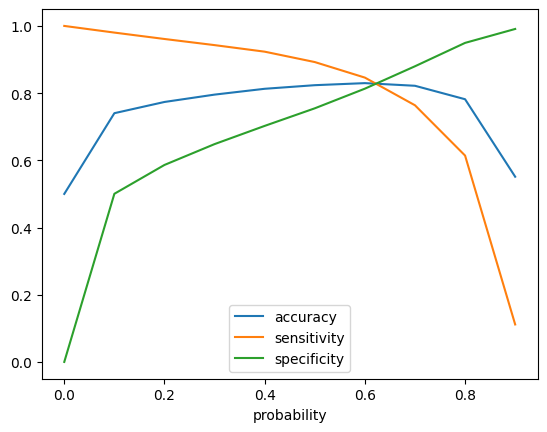

In [119]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

As per the above trade-off between Accuracy, Sensitivity & Specificity, we can see that at 0.6 probability value, our metrics are co-inciding
However, as per our problem statement, we are in desparate need to predict churn customers, hence giving higher weightage to Sensitivity
metric and it attains highest optimal value at 0.5 

In [120]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,6.179002e-01,0,1,1,1,1,1,1,1,0,0,0,1
1,0,1.877752e-01,1,1,1,0,0,0,0,0,0,0,0,0
2,0,6.230517e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,1.011592e-02,3,1,0,0,0,0,0,0,0,0,0,0
4,0,1.482839e-20,4,1,0,0,0,0,0,0,0,0,0,0


In [121]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16171  5254]
 [ 2304 19121]]


In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
from sklearn.metrics import accuracy_score
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8236172695449242
Sensitivity:- 0.8924620770128354
Specificity:- 0.7547724620770129


Plotting the ROC Curve (Trade off between sensitivity & specificity)


In [124]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

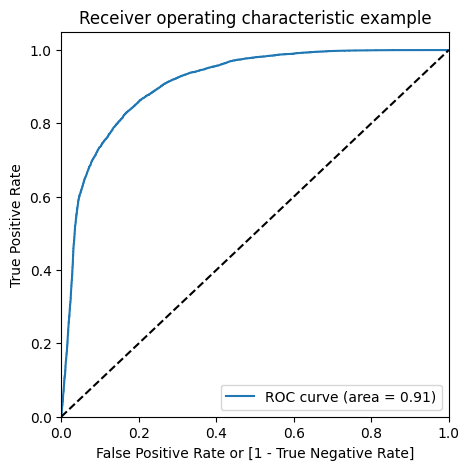

In [125]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])


### Making Predictions on the test set



In [126]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test = X_test[col]

In [127]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test)

In [128]:
# Predictions on the test set with final model
y_test_pred = logreg5.predict(X_test_sm)

In [129]:
y_test_pred.head()


5704     0.028980
64892    0.003709
39613    0.249800
93118    0.017899
81235    0.009846
dtype: float64

In [130]:
# Converting y_test_pred array to y_test_pred DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

# similarly, Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [131]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [132]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [133]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.028980
1,0,64892,0.003709
2,0,39613,0.249800
3,0,93118,0.017899
4,0,81235,0.009846


In [134]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [135]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)
y_test_pred_final

,CustID,churn,churn_prob
0,5704,0,0.028980
1,64892,0,0.003709
2,39613,0,0.249800
3,93118,0,0.017899
4,81235,0,0.009846
...,...,...,...
5536,28372,0,0.000010
5537,5011,0,0.138134
5538,61092,0,0.027793
5539,21597,0,0.040513


Using probability cut-off we got in the train set, applying it to test set

In [136]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.028980,0
1,64892,0,0.003709,0
2,39613,0,0.249800,0
3,93118,0,0.017899,0
4,81235,0,0.009846,0


In [137]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[3995 1353]
 [  32  161]]


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7500451182097094
Sensitivity:- 0.8341968911917098
Specificity:- 0.7470082273747195


*Model summary*

Train set
Accuracy = 0.82
Sensitivity = 0.89
Specificity = 0.75

Test set

Accuracy = 0.75
Sensitivity = 0.83
Specificity = 0.74

Of the Important predictors of churn and non-churn as obtained in final 'logreg5' model, Let's visualize few of important ones

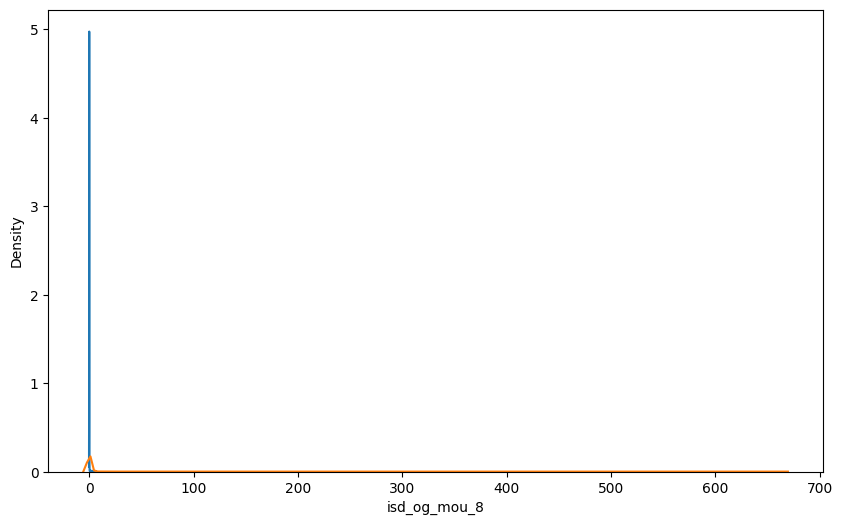

In [141]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(5,7))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()


We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the other hand for the non churn customers it is little more than the churn customers.

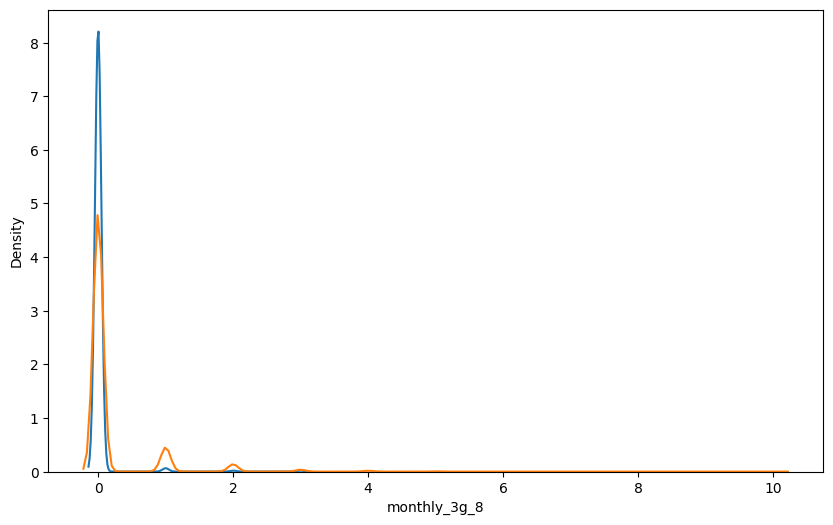

In [142]:
# Ploting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],hist=False, label='churn',)
sns.distplot(data_non_churn['monthly_3g_8'],hist=False, label='not churn',)
plt.show()

The number of monthly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

In [ ]:
# Ploting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(7,5))
sns.distplot(data_churn['loc_ic_mou_8'],hist=False, label='churn')
sns.distplot(data_non_churn['loc_ic_mou_8'],hist=False, label='not churn')
plt.show()

Intuitively, the minutes of usage (MOU_8) for August is mostly concentrated on the lower side/close to 0 for churn customers than for non churn customers.


In [ ]:
# 
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_2g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_2g_8'],label='not churn',hist=False)
plt.show()

Customers decreasing their monthly 2g usage in action phase are likely to churn

Similarly we can plot each variables, which have higher coefficients, churn distribution.